In [3]:
from mmw.parse import *

In [4]:
all_essays, all_questions, all_answers = load_results('data/evaluations/run_3_ft_ada')

In [7]:
marked_essays, filtered_marked_essays, questions = parse_annotations()

In [5]:
essay_str_list = [int(e[0][:-5][-2:]) for e in all_essays]

In [6]:
all_answers[0]

(0,
 0,
 'Given is a student essay and a question to the essay. Please rate the Question with a number between 0 and 3, where 0 is "not at all satisfied" and 3 is "very satisfied.".\n\nEssay: """\nThe Cage\nIt felt like I was walking forever, i didn\'t even know were i was i just knew i was somewhere. A creepy aliway to be exazaced. To be honest i would rather\nbe at school than this nightmare well not to brag but i was not scared in the slightited, anyway desided just to keep walking to see what was down this\naliway, just as i was almost there thunder shot right though the sky it was like someone had a shotgun shot a bullet right next to my ear jezz i was not\nprepared for that, where there is thunder there is rain and i was not gonna get my new guchi shoes wet so i bulted to the end of the crusty aliway,\ni saw... well i didn\'t see anything other than cages, well i guess it was just a dream cause i don\'t own\nguchi shoes. OK enough of me being broke I gotta get to school. Time for

In [8]:
all_parsed_answers = []
for a in all_answers:
    essat_id = essay_str_list[a[0]]
    
    all_parsed_answers.append((a[0],a[1],
                               int(marked_essays[marked_essays['essay id']==essat_id].iloc[0][1+a[1]]), 
                               int(a[3]['choices'][0]['text'][:2])))

In [9]:
differences = [abs(a[-2]-a[-1]) for a in all_parsed_answers]

In [10]:
from matplotlib import pyplot as plt

(array([123.,   0.,   0.,  61.,   0.,   0.,  10.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

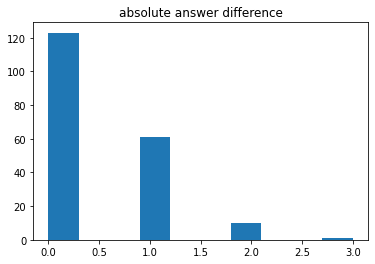

In [11]:
plt.title('absolute answer difference')
plt.hist(differences)

In [24]:
accumulated_variances_essays_list = {k:[] for k in range(len(set([a[0] for a in all_parsed_answers])))}
for a in all_parsed_answers:
    accumulated_variances_essays_list[a[0]].append(abs(a[-2]-a[-1]))

In [13]:
import numpy as np

(array([19.,  0.,  0., 60.,  0.,  0., 67.,  0.,  0., 49.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

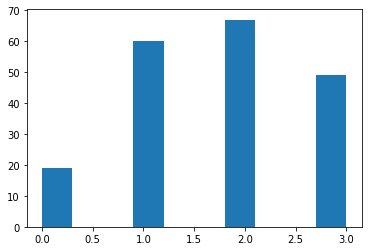

In [20]:
plt.hist([int(a[3]['choices'][0]['text'][:2]) for a in all_answers])

In [21]:
len(all_answers)

195

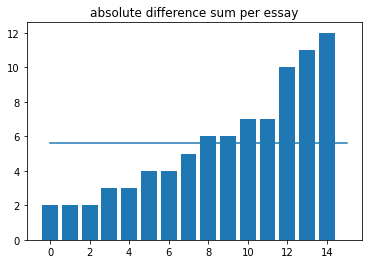

In [26]:
plt.title('absolute difference sum per essay')
plt.bar(list(range(len(accumulated_variances_essays_list))), sorted([sum(a) for a in accumulated_variances_essays_list.values()]))
plt.plot([0,len(accumulated_variances_essays_list)],[np.average([sum(a) for a in accumulated_variances_essays_list.values()])]*2)

In [27]:
sorted_sum_list = sorted(enumerate([sum(a) for a in accumulated_variances_essays_list.values()]), key = lambda x: x[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0626080a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0626012070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06260808b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0626012610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f06260128e0>,
 'means': []}

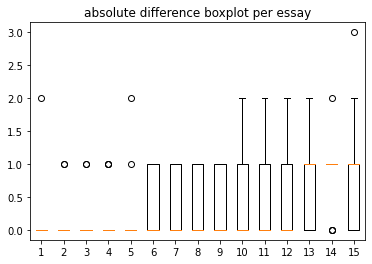

In [29]:
plt.title('absolute difference boxplot per essay')
plt.boxplot([list(accumulated_variances_essays_list.values())[s[0]] for s in sorted_sum_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0625e1ebe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0625e2e0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0625e1e910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0625e2e640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0625e2e910>],
 'means': []}

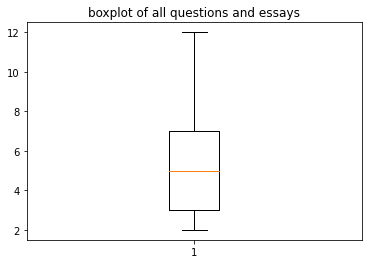

In [34]:
plt.title('boxplot of all questions and essays')
plt.boxplot([sum(s) for s in accumulated_variances_essays_list.values()])

In [35]:
current = -1 #questionid
accumulated_variances_list = {k:[] for k in range(13)}

for a in all_parsed_answers:
    accumulated_variances_list[a[1]].append(abs(a[-2]-a[-1]))

<BarContainer object of 13 artists>

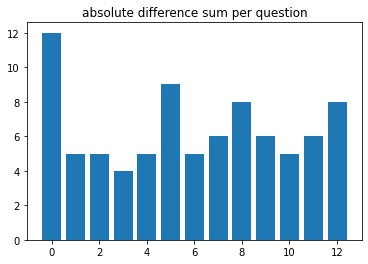

In [36]:
plt.title('absolute difference sum per question')
plt.bar(list(range(13)), [sum(accumulated_variances_list[k]) for k in accumulated_variances_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0625bd00a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0625bd0640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0625c42eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0625bd0c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0625bd0f10>,
 'means': []}

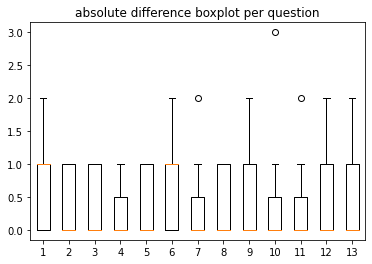

In [38]:
plt.title('absolute difference boxplot per question')
plt.boxplot([accumulated_variances_list[k] for k in accumulated_variances_list])